In [1]:
import Disentangler_Draft as dd
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename


In [2]:
frequency_list_1 = [0.6369, 1.2738748 , 4.45856181, 6.36937401, 7.00631141]

In [3]:
frequency_list_2 = [0.1217, 0.24339455, 0.97357818, 1.21697273,1.46036728, 0.48678909, 1.70376182, 2.19055091]

In [4]:
frequency_list_3 = [0.7658, 1.53153077, 6.12612309, 6.89188848]

In [163]:
search_result = lk.search_targetpixelfile('TIC168789840',sector = 31)
tpf = search_result.download(quality_bitmask='default')

In [164]:
test1 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 10)

In [165]:
test2 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 10)

In [166]:
test3 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 10)

## First set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   4.989527   4.129572   
1       6  63.531045 -31.922942  4882954370433202432   6.485178   3.418882   
2       7  63.501002 -31.912103  4882954645311111424   3.039327   7.159800   
3      10  63.539797 -31.905226  4882954782750061952   8.914579   5.772317   
4       8  63.504079 -31.898122  4882954645311109888   4.422503   9.266358   
5       2  63.551764 -31.923042  4882953648878696064   9.364490   2.055162   
6       1  63.538407 -31.948241  4882953545799483520   5.782384  -1.233081   
7       9  63.492912 -31.896146  4882954714030587648   3.000958  10.318150   
8      11  63.536848 -31.883303  4882954885829275904  10.001202   9.580442   
9       0  63.557434 -31.946734  4882953374000789632   8.535196  -2.221567   
10      4  63.573763 -31.913668  4882953992476077824  13.069768   2.170121   
11     14  63.458284 -31.901152  4883001511994247040  -2.166857 

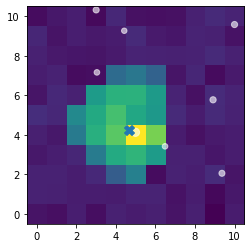

In [167]:
test1.info()

## Second set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   4.989527   4.129572   
1       6  63.531045 -31.922942  4882954370433202432   6.485178   3.418882   
2       7  63.501002 -31.912103  4882954645311111424   3.039327   7.159800   
3      10  63.539797 -31.905226  4882954782750061952   8.914579   5.772317   
4       8  63.504079 -31.898122  4882954645311109888   4.422503   9.266358   
5       2  63.551764 -31.923042  4882953648878696064   9.364490   2.055162   
6       1  63.538407 -31.948241  4882953545799483520   5.782384  -1.233081   
7       9  63.492912 -31.896146  4882954714030587648   3.000958  10.318150   
8       0  63.557434 -31.946734  4882953374000789632   8.535196  -2.221567   
9      11  63.536848 -31.883303  4882954885829275904  10.001202   9.580442   
10      4  63.573763 -31.913668  4882953992476077824  13.069768   2.170121   
11     14  63.458284 -31.901152  4883001511994247040  -2.166857 

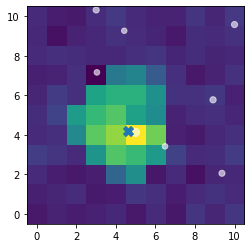

In [168]:
test2.info()

## Third set of frequencies:

    index         ra        dec               source          x          y  \
0       5  63.520278 -31.922877  4882954370431549824   4.989527   4.129572   
1       6  63.531045 -31.922942  4882954370433202432   6.485178   3.418882   
2       7  63.501002 -31.912103  4882954645311111424   3.039327   7.159800   
3      10  63.539797 -31.905226  4882954782750061952   8.914579   5.772317   
4       8  63.504079 -31.898122  4882954645311109888   4.422503   9.266358   
5       2  63.551764 -31.923042  4882953648878696064   9.364490   2.055162   
6       1  63.538407 -31.948241  4882953545799483520   5.782384  -1.233081   
7       9  63.492912 -31.896146  4882954714030587648   3.000958  10.318150   
8       0  63.557434 -31.946734  4882953374000789632   8.535196  -2.221567   
9      11  63.536848 -31.883303  4882954885829275904  10.001202   9.580442   
10      4  63.573763 -31.913668  4882953992476077824  13.069768   2.170121   
11     14  63.458284 -31.901152  4883001511994247040  -2.166857 

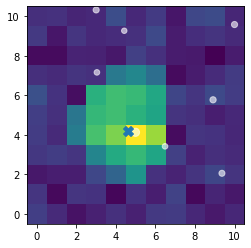

In [169]:
test3.info()

In [170]:
c1 = test1.centroid

In [171]:
c2 = test2.centroid

In [172]:
c3 = test3.centroid

In [173]:
np.sqrt(test2.result.params['x'].stderr**2 + test2.result.params['y'].stderr**2 + test3.result.params['x'].stderr**2 + test3.result.params['y'].stderr**2)

0.05012132908106561

In [174]:
np.sqrt((c3[0] - c1[0])**2 + (c3[1]-c1[1])**2) 

0.06393822317448326

In [175]:
np.sqrt((c2[0] - c3[0])**2 + (c2[1]-c3[1])**2)

0.01251513828941355

In [176]:
np.arctan((c2[1]-c3[1])/(c2[0] - c3[0]))*180/np.pi

8.50481250969125

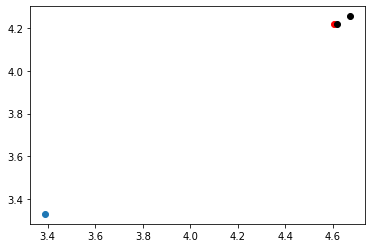

In [177]:
plt.scatter(x=c1[0],y=c1[1],c='black')
plt.scatter(x=c2[0],y=c2[1],c='red')
plt.scatter(x=c3[0],y=c3[1],c='black')
plt.scatter(x=3.390177 , y= 3.331794)

In [162]:
search_result1 = lk.search_tesscut('TIC168789840')
tpfcut = search_result1.download_all(cutout_size=11)

SearchError: Unable to download FFI cutout. Desired target coordinates may be too near the edge of the FFI.Error: 500 Server Error: Internal Server Error for url: https://mast.stsci.edu/tesscut/api/v0.1/sector

In [10]:
search_result1 = lk.search_tesscut('TIC168789840')

In [5]:
target1 = lk.TessTargetPixelFile('tess-s0004-2-2_63.520209_-31.922876_10x10_astrocut.fits')

In [466]:
test_11 = dd.PixelMapFit(targetpixelfile=target1, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 9,aperture=target1.create_threshold_mask(threshold=1) )
test_12 = dd.PixelMapFit(targetpixelfile=target1, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 9,aperture=target1.create_threshold_mask(threshold=1) )
test_13 = dd.PixelMapFit(targetpixelfile=target1, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 9,aperture=target1.create_threshold_mask(threshold=1) )

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.162786   4.511412   
1       5  63.531042 -31.922941  4882954370433202432   6.665711   3.700115   
2       6  63.501000 -31.912100  4882954645311111424   3.286673   7.696050   
3       7  63.504078 -31.898117  4882954645311109888   4.787549   9.738718   
4       9  63.539786 -31.905228  4882954782750061952   9.246527   5.926558   
5       8  63.492911 -31.896143  4882954714030587648   3.373733  10.890074   
6       2  63.551763 -31.923037  4882953648878696064   9.560640   2.142588   
7       1  63.538406 -31.948243  4882953545799483520   5.760262  -0.957590   
8      10  63.536843 -31.883312  4882954885829275904  10.511971   9.705462   
9       0  63.557430 -31.946739  4882953374000789632   8.539240  -2.128739   
10      3  63.573753 -31.913676  4882953992476077824  13.357683   2.025701   
11     11  63.458286 -31.901157  4883001511994247040  -1.862040 

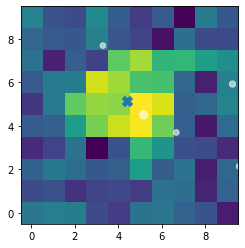

In [467]:
test_11.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.162786   4.511412   
1       5  63.531042 -31.922941  4882954370433202432   6.665711   3.700115   
2       6  63.501000 -31.912100  4882954645311111424   3.286673   7.696050   
3       7  63.504078 -31.898117  4882954645311109888   4.787549   9.738718   
4       9  63.539786 -31.905228  4882954782750061952   9.246527   5.926558   
5       2  63.551763 -31.923037  4882953648878696064   9.560640   2.142588   
6       8  63.492911 -31.896143  4882954714030587648   3.373733  10.890074   
7       1  63.538406 -31.948243  4882953545799483520   5.760262  -0.957590   
8      10  63.536843 -31.883312  4882954885829275904  10.511971   9.705462   
9       0  63.557430 -31.946739  4882953374000789632   8.539240  -2.128739   
10      3  63.573753 -31.913676  4882953992476077824  13.357683   2.025701   
11     11  63.458286 -31.901157  4883001511994247040  -1.862040 

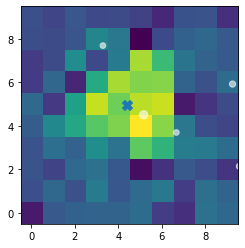

In [468]:
test_12.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.162786   4.511412   
1       5  63.531042 -31.922941  4882954370433202432   6.665711   3.700115   
2       6  63.501000 -31.912100  4882954645311111424   3.286673   7.696050   
3       7  63.504078 -31.898117  4882954645311109888   4.787549   9.738718   
4       9  63.539786 -31.905228  4882954782750061952   9.246527   5.926558   
5       2  63.551763 -31.923037  4882953648878696064   9.560640   2.142588   
6       1  63.538406 -31.948243  4882953545799483520   5.760262  -0.957590   
7       8  63.492911 -31.896143  4882954714030587648   3.373733  10.890074   
8      10  63.536843 -31.883312  4882954885829275904  10.511971   9.705462   
9       0  63.557430 -31.946739  4882953374000789632   8.539240  -2.128739   
10      3  63.573753 -31.913676  4882953992476077824  13.357683   2.025701   
11     11  63.458286 -31.901157  4883001511994247040  -1.862040 

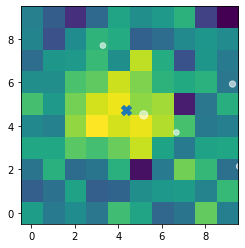

In [469]:
test_13.info()

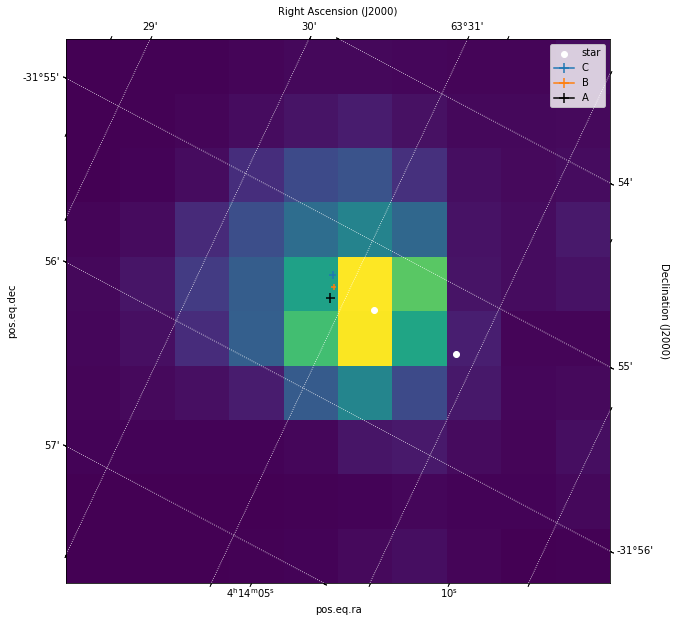

In [474]:
x1 = test_11.result.params['x']
x2 = test_12.result.params['x']
x3 = test_13.result.params['x']
y1 = test_11.result.params['y']
y2 = test_12.result.params['y']
y3 = test_13.result.params['y']



filename = 'tess-s0004-2-2_63.520209_-31.922876_10x10_astrocut.fits'

hdu = fits.open(filename)
wcs = WCS(hdu[2].header)
plt.figure(figsize=(10, 10))

ax = plt.subplot(projection=wcs)

ax.imshow(hdu[1].data[0][5], origin='lower')


overlay = ax.get_coords_overlay(frame="fk5")
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
ax.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
ax.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')

ax.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A',c='black')
ax.scatter(test_11.starfit['x'][0:2],test_11.starfit['y'][0:2],label = 'star',c='white')
#ax.set_xlim(4,6)
#ax.set_ylim(4,6)
ax.legend()

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: None, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

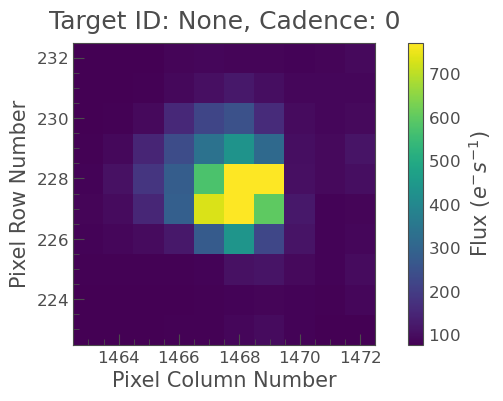

In [488]:
target1.plot()

In [179]:
target2 = lk.TessTargetPixelFile('tess-s0005-2-1_63.520209_-31.922876_10x10_astrocut.fits')

In [222]:
test_21 = dd.PixelMapFit(targetpixelfile=target2, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 1,aperture=target2.create_threshold_mask(threshold=1) )
test_22 = dd.PixelMapFit(targetpixelfile=target2, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 1,aperture=target2.create_threshold_mask(threshold=1) )
test_23 = dd.PixelMapFit(targetpixelfile=target2, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 1,aperture=target2.create_threshold_mask(threshold=1) )

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.730746   5.290801   
1       5  63.531042 -31.922941  4882954370433202432   6.375524   5.138812   
2       6  63.501000 -31.912100  4882954645311111424   2.064679   7.525867   
3       9  63.539786 -31.905228  4882954782750061952   8.178495   8.286580   
4       7  63.504078 -31.898117  4882954645311109888   2.902121  10.060740   
5       2  63.551763 -31.923037  4882953648878696064   9.542173   4.850922   
6       1  63.538406 -31.948243  4882953545799483520   6.836941   0.383729   
7       8  63.492911 -31.896143  4882954714030587648   1.245337  10.569274   
8       0  63.557430 -31.946738  4882953374000789632   9.785366   0.412535   
9      10  63.536843 -31.883312  4882954885829275904   8.304159  12.360725   
10      3  63.573754 -31.913676  4882953992476077824  13.152180   6.287237   
11     11  63.458286 -31.901157  4883001511994247040  -4.183580 

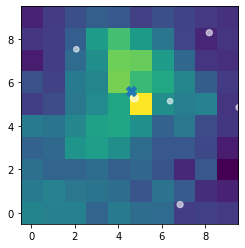

In [223]:
test_21.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.730746   5.290801   
1       5  63.531042 -31.922941  4882954370433202432   6.375524   5.138812   
2       6  63.501000 -31.912100  4882954645311111424   2.064679   7.525867   
3       9  63.539786 -31.905228  4882954782750061952   8.178495   8.286580   
4       2  63.551763 -31.923037  4882953648878696064   9.542173   4.850922   
5       7  63.504078 -31.898117  4882954645311109888   2.902121  10.060740   
6       1  63.538406 -31.948243  4882953545799483520   6.836941   0.383729   
7       8  63.492911 -31.896143  4882954714030587648   1.245337  10.569274   
8       0  63.557430 -31.946738  4882953374000789632   9.785366   0.412535   
9      10  63.536843 -31.883312  4882954885829275904   8.304159  12.360725   
10      3  63.573754 -31.913676  4882953992476077824  13.152180   6.287237   
11     11  63.458286 -31.901157  4883001511994247040  -4.183580 

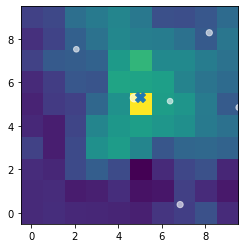

In [224]:
test_22.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.730746   5.290801   
1       5  63.531042 -31.922941  4882954370433202432   6.375524   5.138812   
2       6  63.501000 -31.912100  4882954645311111424   2.064679   7.525867   
3       9  63.539786 -31.905228  4882954782750061952   8.178495   8.286580   
4       2  63.551763 -31.923037  4882953648878696064   9.542173   4.850922   
5       7  63.504078 -31.898117  4882954645311109888   2.902121  10.060740   
6       1  63.538406 -31.948243  4882953545799483520   6.836941   0.383729   
7       8  63.492911 -31.896143  4882954714030587648   1.245337  10.569274   
8       0  63.557430 -31.946738  4882953374000789632   9.785366   0.412535   
9      10  63.536843 -31.883312  4882954885829275904   8.304159  12.360725   
10      3  63.573754 -31.913676  4882953992476077824  13.152180   6.287237   
11     11  63.458286 -31.901157  4883001511994247040  -4.183580 

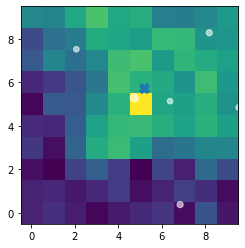

In [225]:
test_23.info()

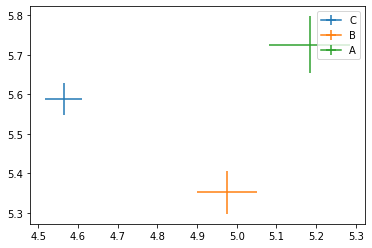

In [226]:
x1 = test_21.result.params['x']
x2 = test_22.result.params['x']
x3 = test_23.result.params['x']
y1 = test_21.result.params['y']
y2 = test_22.result.params['y']
y3 = test_23.result.params['y']

plt.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
plt.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')
plt.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A')
plt.legend()

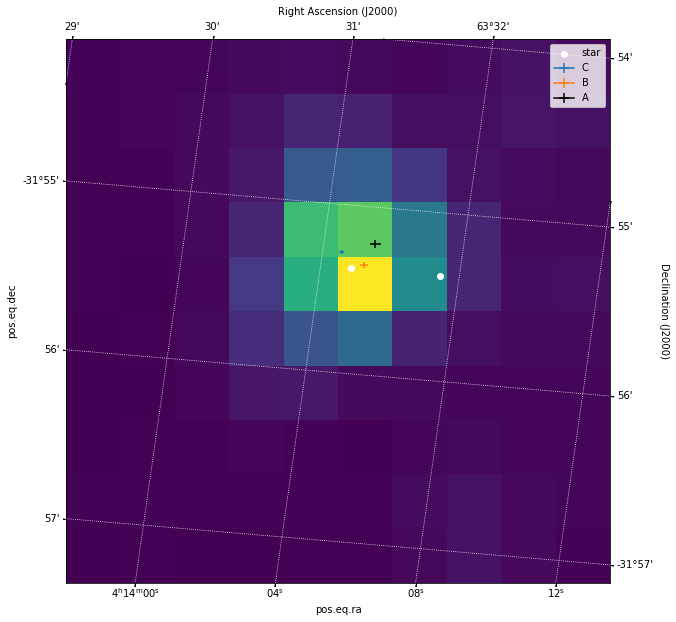

In [475]:
x1 = test_21.result.params['x']
x2 = test_22.result.params['x']
x3 = test_23.result.params['x']
y1 = test_21.result.params['y']
y2 = test_22.result.params['y']
y3 = test_23.result.params['y']



filename = 'tess-s0005-2-1_63.520209_-31.922876_10x10_astrocut.fits'

hdu = fits.open(filename)
wcs = WCS(hdu[2].header)
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)

ax.imshow(hdu[1].data[0][5], origin='lower')

overlay = ax.get_coords_overlay(frame="fk5")
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
ax.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
ax.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')

ax.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A',c='black')
ax.scatter(test_21.starfit['x'][0:2],test_21.starfit['y'][0:2],label = 'star',c='white')

#ax.set_xlim(4,6)
#ax.set_ylim(4,6)
ax.legend()

In [25]:
target3 = lk.TessTargetPixelFile('tess-s0031-2-2_63.520209_-31.922876_10x10_astrocut.fits')

In [124]:
test_31 = dd.PixelMapFit(targetpixelfile=target3, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 8,aperture=target3.create_threshold_mask(threshold=.5) )
test_32 = dd.PixelMapFit(targetpixelfile=target3, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 8,aperture=target3.create_threshold_mask(threshold=.5) )
test_33 = dd.PixelMapFit(targetpixelfile=target3, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 8,aperture=target3.create_threshold_mask(threshold=.5) )

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.987077   5.119169   
1       5  63.531045 -31.922942  4882954370433202432   6.482716   4.408449   
2       6  63.501002 -31.912103  4882954645311111424   3.036872   8.149703   
3       9  63.539797 -31.905226  4882954782750061952   8.912057   6.762282   
4       7  63.504079 -31.898122  4882954645311109888   4.420006  10.256585   
5       2  63.551764 -31.923042  4882953648878696064   9.362001   3.044673   
6       1  63.538407 -31.948241  4882953545799483520   5.779981  -0.244133   
7       8  63.492912 -31.896146  4882954714030587648   2.998469  11.308453   
8      10  63.536848 -31.883303  4882954885829275904   9.998624  10.570936   
9       0  63.557434 -31.946734  4882953374000789632   8.532765  -1.232634   
10      3  63.573763 -31.913668  4882953992476077824  13.067227   3.159797   
11     11  63.458284 -31.901152  4883001511994247040  -2.169288 

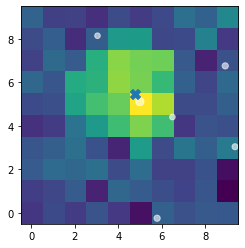

In [125]:
test_31.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.987077   5.119169   
1       5  63.531045 -31.922942  4882954370433202432   6.482716   4.408449   
2       6  63.501002 -31.912103  4882954645311111424   3.036872   8.149703   
3       9  63.539797 -31.905226  4882954782750061952   8.912057   6.762282   
4       2  63.551764 -31.923042  4882953648878696064   9.362001   3.044673   
5       1  63.538407 -31.948241  4882953545799483520   5.779981  -0.244133   
6       7  63.504079 -31.898122  4882954645311109888   4.420006  10.256585   
7       8  63.492912 -31.896146  4882954714030587648   2.998469  11.308453   
8       0  63.557434 -31.946734  4882953374000789632   8.532765  -1.232634   
9      10  63.536848 -31.883303  4882954885829275904   9.998624  10.570936   
10      3  63.573763 -31.913668  4882953992476077824  13.067227   3.159797   
11     11  63.458284 -31.901152  4883001511994247040  -2.169288 

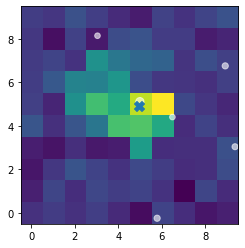

In [126]:
test_32.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   4.987077   5.119169   
1       5  63.531045 -31.922942  4882954370433202432   6.482716   4.408449   
2       6  63.501002 -31.912103  4882954645311111424   3.036872   8.149703   
3       9  63.539797 -31.905226  4882954782750061952   8.912057   6.762282   
4       2  63.551764 -31.923042  4882953648878696064   9.362001   3.044673   
5       7  63.504079 -31.898122  4882954645311109888   4.420006  10.256585   
6       1  63.538407 -31.948241  4882953545799483520   5.779981  -0.244133   
7       8  63.492912 -31.896146  4882954714030587648   2.998469  11.308453   
8       0  63.557434 -31.946734  4882953374000789632   8.532765  -1.232634   
9      10  63.536848 -31.883303  4882954885829275904   9.998624  10.570936   
10      3  63.573763 -31.913668  4882953992476077824  13.067227   3.159797   
11     11  63.458284 -31.901152  4883001511994247040  -2.169288 

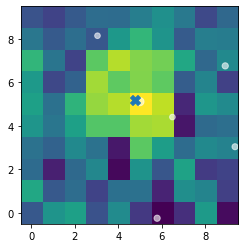

In [127]:
test_33.info()

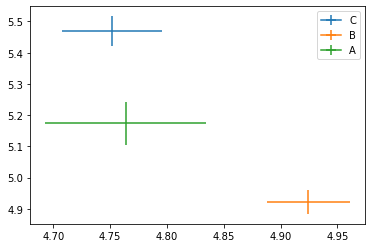

In [188]:
x1 = test_31.result.params['x']
x2 = test_32.result.params['x']
x3 = test_33.result.params['x']
y1 = test_31.result.params['y']
y2 = test_32.result.params['y']
y3 = test_33.result.params['y']

plt.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
plt.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')
plt.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A')
plt.legend()

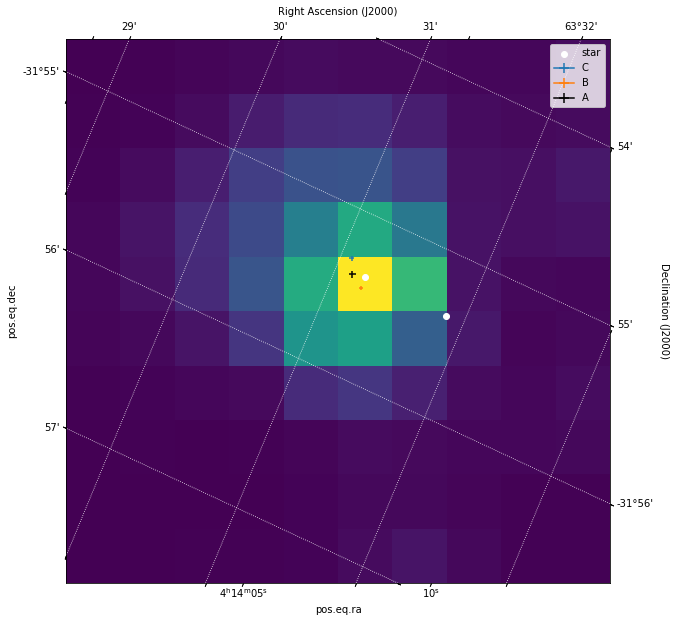

In [476]:
x1 = test_31.result.params['x']
x2 = test_32.result.params['x']
x3 = test_33.result.params['x']
y1 = test_31.result.params['y']
y2 = test_32.result.params['y']
y3 = test_33.result.params['y']



filename = 'tess-s0031-2-2_63.520209_-31.922876_10x10_astrocut.fits'

hdu = fits.open(filename)
wcs = WCS(hdu[2].header)
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)

ax.imshow(hdu[1].data[0][5], origin='lower')


overlay = ax.get_coords_overlay(frame="fk5")
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
ax.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
ax.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')

ax.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A',c='black')
ax.scatter(test_31.starfit['x'][0:2],test_31.starfit['y'][0:2],label = 'star',c='white')

#ax.set_xlim(4,6)
#ax.set_ylim(4,6)
ax.legend()

In [31]:
target4 = lk.TessTargetPixelFile('tess-s0032-2-1_63.520209_-31.922876_10x10_astrocut.fits')

In [158]:
test_41 = dd.PixelMapFit(targetpixelfile=target4, gaia=True, magnitude_limit=18, frequencies=frequency_list_1, frequnit=1/u.day, principle_components = 10,aperture=target4.create_threshold_mask(threshold=1) )
test_42 = dd.PixelMapFit(targetpixelfile=target4, gaia=True, magnitude_limit=18, frequencies=frequency_list_2, frequnit=1/u.day, principle_components = 10,aperture=target4.create_threshold_mask(threshold=1) )
test_43 = dd.PixelMapFit(targetpixelfile=target4, gaia=True, magnitude_limit=18, frequencies=frequency_list_3, frequnit=1/u.day, principle_components = 10,aperture=target4.create_threshold_mask(threshold=1) )

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.426917   5.343048   
1       5  63.531046 -31.922942  4882954370433202432   7.167035   5.339986   
2       6  63.501002 -31.912103  4882954645311111424   2.502990   7.381553   
3       9  63.539797 -31.905226  4882954782750061952   8.901281   8.727787   
4       2  63.551764 -31.923042  4882953648878696064  10.515529   5.338368   
5       7  63.504079 -31.898122  4882954645311109888   3.251639  10.051848   
6       1  63.538407 -31.948241  4882953545799483520   7.901864   0.519093   
7       8  63.492912 -31.896146  4882954714030587648   1.480580  10.418736   
8       0  63.557434 -31.946734  4882953374000789632  11.005107   0.822577   
9      10  63.536848 -31.883303  4882954885829275904   8.818920  12.908207   
10      3  63.573764 -31.913668  4882953992476077824  14.242433   7.144968   
11     11  63.458284 -31.901152  4883001511994247040  -4.210396 

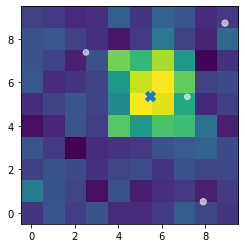

In [159]:
test_41.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.426917   5.343048   
1       5  63.531046 -31.922942  4882954370433202432   7.167035   5.339986   
2       6  63.501002 -31.912103  4882954645311111424   2.502990   7.381553   
3       9  63.539797 -31.905226  4882954782750061952   8.901281   8.727787   
4       2  63.551764 -31.923042  4882953648878696064  10.515529   5.338368   
5       7  63.504079 -31.898122  4882954645311109888   3.251639  10.051848   
6       1  63.538407 -31.948241  4882953545799483520   7.901864   0.519093   
7       8  63.492912 -31.896146  4882954714030587648   1.480580  10.418736   
8       0  63.557434 -31.946734  4882953374000789632  11.005107   0.822577   
9      10  63.536848 -31.883303  4882954885829275904   8.818920  12.908207   
10      3  63.573764 -31.913668  4882953992476077824  14.242433   7.144968   
11     11  63.458284 -31.901152  4883001511994247040  -4.210396 

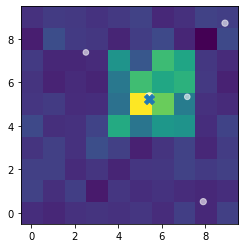

In [160]:
test_42.info()

    index         ra        dec               source          x          y  \
0       4  63.520278 -31.922877  4882954370431549824   5.426917   5.343048   
1       5  63.531046 -31.922942  4882954370433202432   7.167035   5.339986   
2       6  63.501002 -31.912103  4882954645311111424   2.502990   7.381553   
3       9  63.539797 -31.905226  4882954782750061952   8.901281   8.727787   
4       2  63.551764 -31.923042  4882953648878696064  10.515529   5.338368   
5       7  63.504079 -31.898122  4882954645311109888   3.251639  10.051848   
6       1  63.538407 -31.948241  4882953545799483520   7.901864   0.519093   
7       8  63.492912 -31.896146  4882954714030587648   1.480580  10.418736   
8       0  63.557434 -31.946734  4882953374000789632  11.005107   0.822577   
9      10  63.536848 -31.883303  4882954885829275904   8.818920  12.908207   
10      3  63.573764 -31.913668  4882953992476077824  14.242433   7.144968   
11     11  63.458284 -31.901152  4883001511994247040  -4.210396 

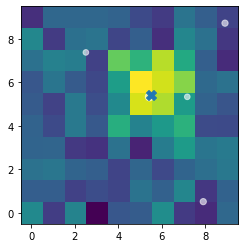

In [161]:
test_43.info()

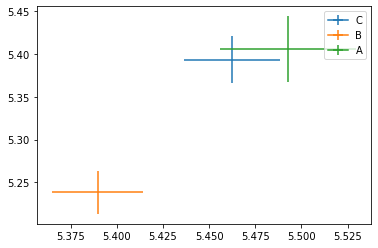

In [189]:
x1 = test_41.result.params['x']
x2 = test_42.result.params['x']
x3 = test_43.result.params['x']
y1 = test_41.result.params['y']
y2 = test_42.result.params['y']
y3 = test_43.result.params['y']

plt.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
plt.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')
plt.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A')
plt.legend()

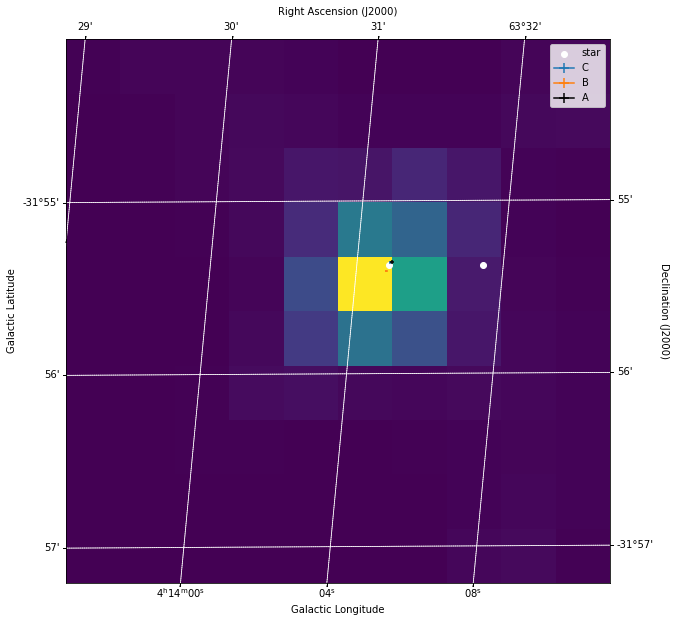

In [524]:
x1 = test_41.result.params['x']
x2 = test_42.result.params['x']
x3 = test_43.result.params['x']
y1 = test_41.result.params['y']
y2 = test_42.result.params['y']
y3 = test_43.result.params['y']



filename = 'tess-s0032-2-1_63.520209_-31.922876_10x10_astrocut.fits'

hdu = fits.open(filename)
wcs = WCS(hdu[2].header)
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)

ax.imshow(hdu[1].data[20][4], origin='lower')

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')
overlay = ax.get_coords_overlay(frame="fk5")
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
ax.errorbar(x = x1, y=y1, xerr=x1.stderr, yerr=y1.stderr,label ='C')
ax.errorbar(x = x2, y=y2, xerr=x2.stderr, yerr=y2.stderr,label='B')

ax.errorbar(x = x3, y=y3, xerr=x3.stderr, yerr=y3.stderr,label='A',c='black')
ax.scatter(test_41.starfit['x'][0:2],test_41.starfit['y'][0:2],label = 'star',c='white')

#ax.set_xlim(4,6)
#ax.set_ylim(4,6)
ax.legend()

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: None, Cadence: 20'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

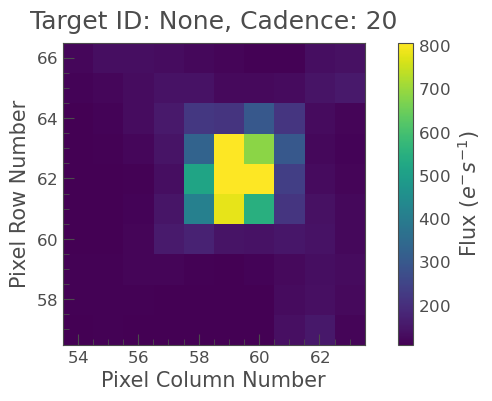

In [531]:
target4.plot(frame=20)

In [132]:
tpf.interact()

In [98]:
from astropy.io import fits

In [489]:
hdul = fits.open('tess2019107181901-prf-2-2-row0513-col1580.fits')
hdul.header

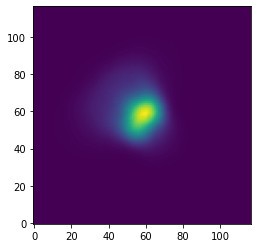

In [498]:
plt.imshow(hdul[0].data,origin='lower')

#plt.xlim(100,116)
#plt.ylim(45,70)

In [284]:
hdul[0].data

array([[0.00012092, 0.00012582, 0.00012927, ..., 0.00015412, 0.0001455 ,
        0.00013136],
       [0.00011189, 0.00012278, 0.00013037, ..., 0.00015988, 0.00016175,
        0.00014413],
       [0.00011764, 0.00013133, 0.00015939, ..., 0.00016316, 0.00014791,
        0.00015244],
       ...,
       [0.00015875, 0.00015522, 0.00015627, ..., 0.00015151, 0.00013481,
        0.00014026],
       [0.00016891, 0.00015117, 0.00016169, ..., 0.00015156, 0.00014565,
        0.00012737],
       [0.00017313, 0.00016149, 0.00016765, ..., 0.00016255, 0.00015573,
        0.00014505]])

In [127]:
search_result = lk.search_targetpixelfile('TIC65144290',sector=7)
tpf = search_result.download(quality_bitmask='default')

In [129]:
fl = [9.40357461, 18.80714921, 28.21072382, 37.61429843, 47.01787303,56.42144764, 65.82502225]

In [130]:
lookat = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=fl, frequnit=u.microhertz, principle_components = 4)

     index          ra        dec               source         x          y  \
0       80  107.828133 -25.317701  5617205108735832576  8.363533   2.983834   
1       99  107.827279 -25.316975  5617205108735832320  8.203991   3.071185   
2       97  107.824608 -25.312528  5617205177455073536  7.613644   3.708704   
3       90  107.823605 -25.321951  5617205108735602816  7.857291   2.091107   
4       94  107.821069 -25.314546  5617205177455078144  7.163223   3.229239   
..     ...         ...        ...                  ...       ...        ...   
225    229  107.789434 -25.245282  5617209369343152128 -0.527147  13.556602   
226    228  107.785936 -25.246770  5617209369343156608 -0.993711  13.167174   
227    222  107.761647 -25.262495  5617209231904231296 -4.006465   9.560765   
228    227  107.776643 -25.249333  5617209334983427840 -2.291613  12.365458   
229    221  107.753058 -25.267601  5617209197544502400 -5.090727   8.361586   

       distance    probability  
0      0.011440   

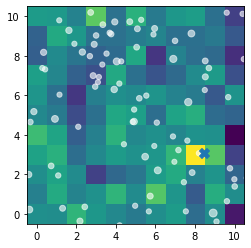

In [131]:
lookat.info()

In [471]:
test_11.starfit['x']

0      5.162786
1      6.665711
2      3.286673
3      4.787549
4      9.246527
5      3.373733
6      9.560640
7      5.760262
8     10.511971
9      8.539240
10    13.357683
11    -1.862040
Name: x, dtype: float64

In [2]:
freq_list = [2194.806,2015.393, 2667.136, 2983.709]#microh

In [3]:
search_result = lk.search_targetpixelfile('TIC333432673',sector = 33)
tpf = search_result.download(quality_bitmask='default')

In [4]:
test1 = dd.PixelMapFit(targetpixelfile=tpf, gaia=True, magnitude_limit=18, frequencies=freq_list[3], principle_components = 4)

IndexError: tuple index out of range

     index          ra        dec                  source          x  \
0       52  100.315170 -13.690020  2.9509077251139973e+18   5.621476   
1       60  100.315895 -13.691691  2.9509077251137126e+18   5.484940   
2       61  100.313244 -13.689547  2.9509077251137126e+18   5.946241   
3       56  100.322248 -13.687801  2.9509077208153457e+18   4.465780   
4       49  100.314175 -13.698422  2.9509076220345016e+18   5.706361   
..     ...         ...        ...                     ...        ...   
134    106  100.380240 -13.689678  2.9524086615656776e+18  -5.195194   
135      3  100.353021 -13.742272   2.950895527406601e+18  -1.171579   
136    118  100.369686 -13.655779  2.9524090395227894e+18  -3.116950   
137    115  100.365723 -13.649557  2.9524091082422636e+18  -2.398399   
138     96  100.284530 -13.633220    2.95090885898461e+18  11.261566   

             y    distance    probability  
0     5.272617    0.005420   9.429376e-01  
1     5.552697    0.066197   3.820279e-01  
2  

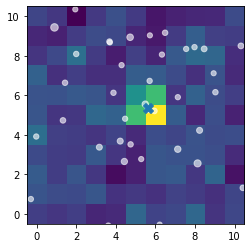

In [18]:
test1.info()

In [19]:
bbb =(np.asarray([1,1,1,1,1,1])*1/(u.d)).to(1/u.d)

In [21]:
np.append((np.asarray([0])*1/(u.d)).to(1/u.d),bbb)

<Quantity [0., 1., 1., 1., 1., 1., 1.] 1 / d>